# Contents and Objectives

* Implementation of the water-filling algorithm
* Interactive illustration of the water-filling principle


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib inline

# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=matplotlib.checkdep_usetex(True))

matplotlib.rc('figure', figsize=(18, 8))

Specify total power p_tot as well as the noise levels of each channel


In [7]:
# Function returns the water-level P_max
def get_waterlevel(sigma_nq, p_tot):    
    # Sort noise values from lowest to largest
    sigma_nq_sort = np.append(np.sort(sigma_nq), 9e99)
    
    index = 0
    
    # start filling from bottom until we reach the next channel
    while index < len(sigma_nq):
        waterlevel = (p_tot + np.sum(sigma_nq_sort[0:(index+1)]))/(index+1)
        if waterlevel < sigma_nq_sort[index+1]:
            return waterlevel
        else:
            index = index + 1          


Illustration of the water-filling algorithm for 3 channels with configurable noise powers.

Water level P_max:  1.45
Powers per channel:  [1.35 0.   0.65]


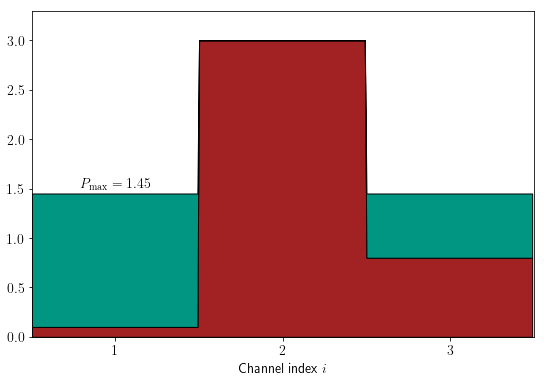

In [9]:
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

p_tot = 2
sigma_nq = np.array([0.1,3,0.8])

waterlevel = get_waterlevel(sigma_nq, p_tot)
water = np.maximum(waterlevel - sigma_nq,0)

print("Water level P_max: ", waterlevel)
print("Powers per channel: ", water)

plt.figure(1,figsize=(9,6))
plt.rcParams.update({'font.size': 14})
cmap = cm.get_cmap('coolwarm')
x = np.arange(0.5,len(sigma_nq)+0.5, 1/100)
y1 = np.repeat(sigma_nq,100)
y2 = np.repeat(water,100)
plt.stackplot(x,y1,y2,colors=('#A22223','#009682'), edgecolor='black')
plt.xlim(0.5,len(sigma_nq)+0.5)
plt.ylim(0,max(sigma_nq+water)*1.1)
nzindex = (water != 0).argmax(axis=0)
plt.text(nzindex+1,sigma_nq[nzindex]+water[nzindex],r'$P_{\max} = %1.2f$' % waterlevel, horizontalalignment='center', verticalalignment='bottom')
plt.xticks(np.arange(1,len(sigma_nq)+1))
plt.xlabel("Channel index $i$")
plt.ylabel("")

plt.show()


*** 
Interactive version with more channels and adjustable water level

In [18]:
sigma_nq = np.array([0.2, 0.3, 1.6, 0.6, 0.17, 0.25, 0.93, 0.78, 1.3, 1.2, 0.66, 0.1, 0.25, 0.29, 0.19, 0.73])

   
def interactive_waterfilling_stack(p_tot):
    waterlevel = get_waterlevel(sigma_nq, p_tot)
    water = np.maximum(waterlevel - sigma_nq,0)

    plt.figure(1,figsize=(15,6))
    plt.rcParams.update({'font.size': 14})
    x = np.arange(0.5,len(sigma_nq)+0.5, 1/100)
    y1 = np.repeat(sigma_nq,100)
    y2 = np.repeat(water,100)
    plt.stackplot(x,y1,y2,colors=('#A22223','#009682'), edgecolor='black')
    plt.xlim(0.5,len(sigma_nq)+0.5)
    plt.ylim(0,max(sigma_nq+water)*1.1)
    nzindex = (water != 0).argmax(axis=0)
    plt.text(nzindex+0.8,sigma_nq[nzindex]+water[nzindex],r'$P_{\max} = %1.2f$' % waterlevel, horizontalalignment='left', verticalalignment='bottom')
    plt.xticks(np.arange(1,len(sigma_nq)+1))
    plt.xlabel("Channel index $i$")
    plt.ylabel("")
    plt.legend([r'$\sigma_{n,i}^2$','$P_i$'])    
    plt.show()


In [19]:
interactive_update = interactive(interactive_waterfilling_stack, \
                                 p_tot = widgets.FloatSlider(min=0.1,max=15.0,step=0.1,value=3, continuous_update=False, description='p_tot',layout=widgets.Layout(width='70%')))

output = interactive_update.children[-1]
output.layout.height = '400px'
interactive_update

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='p_tot', layout=Layout(width…